# Data Analysis in Python - XI: Visualization in Python using matplotlib

## Introduction


The focus of this lesson is visualization in Python. In this lesson, we will learn how to use the matplotlib library to create various types of charts.

Note: 
1. Use the TOC to navigate between sections.


## The role of visualization

Visualization is an important early step in data analysis. It helps analysts understand the data better and identify not only meaningful patterns in data but also problems that might exist in the data.

## Key libraries for visualization

The main library used for visualization in Python is called `matplotlib`. It allows for the greatest degree of customization. When we first started working with pandas, we used the `Series.plot()` and `DataFrame.plot()` to visualize the data in Series and DataFrames. In both cases, pandas internally used the matplotlib library to generate the plots.Please refer to the [matplotlib website](https://matplotlib.org/ ) for details of the concepts and functions discussed in this lesson.

`Seaborn` is a library that uses `matplotlib` but makes it easier to generate good (and more complex) visualizations with fewer lines of code. 

## Datasets

Let's start by importing the data that we will use to create visualizations.

In [1]:
# import datasets
import pandas as pd

# import poverty data (cross-sectional data)
povData = pd.read_csv("../scratch/PovertyData.csv", sep=',', na_values="*")
povData.head()

,LiveBirthRate,DeathRate,InfantDeaths,MaleLifeExpectancy,FemaleLifeExpectancy,GNI,Region,Country
0,24.7,5.7,30.8,69.6,75.5,600.0,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250.0,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980.0,1,Czechoslovakia
3,12.0,12.4,7.6,69.8,75.9,NaN,1,Former_E._Germany
4,11.6,13.4,14.8,65.4,73.8,2780.0,1,Hungary


In [2]:
# import shampoo sales (time series data)
salesData = pd.read_csv('../scratch/shampoo.txt', parse_dates=['Month'], infer_datetime_format = True)
salesData.head()

,Month,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


## Basic visualization with matplotlib using the pandas plot function

First, let's generate some plots using the matplotlib library using the pandas `plot()` function. 

Let's try to generate a simple plot of shampoo sales.

<AxesSubplot:>

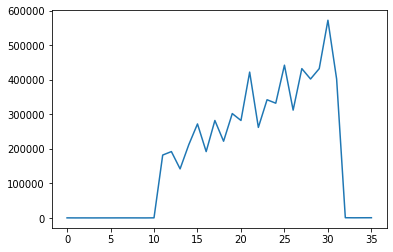

In [3]:
# plot shampoo sales
salesData['Sales'].plot()

If you want to remove the descriptive text above the plot, add a semicolon at the end of the plot() statement. 

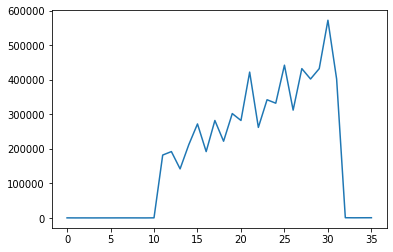

In [4]:
# plot shampoo sales
salesData['Sales'].plot();

Can you tell what's on the Y and X axes of the plot?

Let's try to create a better display of values on the X-axis.

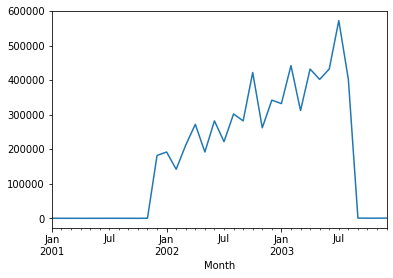

In [5]:
# plot shampoo sales
salesData.set_index('Month',inplace=True)
salesData['Sales'].plot();

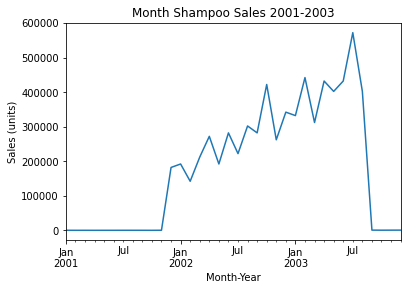

In [6]:
# Add chart title and axis labels
salesData['Sales'].plot(title='Month Shampoo Sales 2001-2003',xlabel='Month-Year',ylabel='Sales (units)');

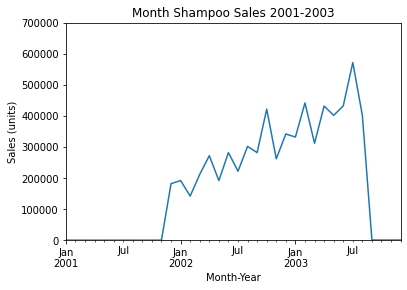

In [7]:
# set y-axis limits
salesData['Sales'].plot(title='Month Shampoo Sales 2001-2003',xlabel='Month-Year',ylabel='Sales (units)',ylim=(0,0.7e6));

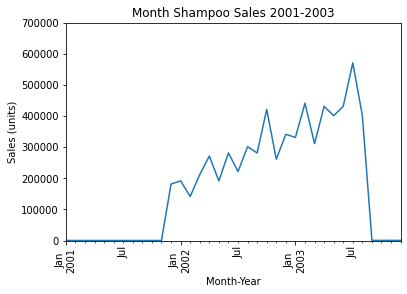

In [8]:
# rotate x-axis
salesData['Sales'].plot(title='Month Shampoo Sales 2001-2003',xlabel='Month-Year',ylabel='Sales (units)',ylim=(0,0.7e6),rot=90);

The plot() function supports various chart types (see the [reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) for a complete list). You can specify the chart type using the `kind` argument.

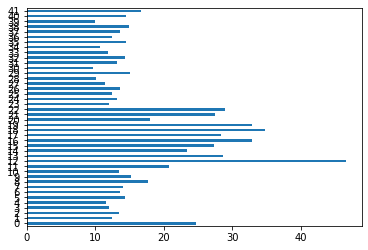

In [9]:
# plot live birth rates of countries in region 1-3
povData[povData['Region']<=3]['LiveBirthRate'].plot(kind='barh');

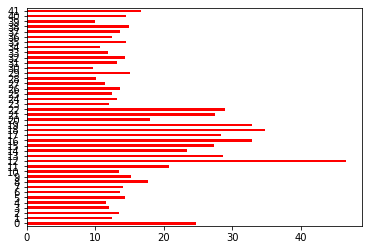

In [10]:
# above plot in red
povData[povData['Region']<=3]['LiveBirthRate'].plot(kind='barh',color='red');

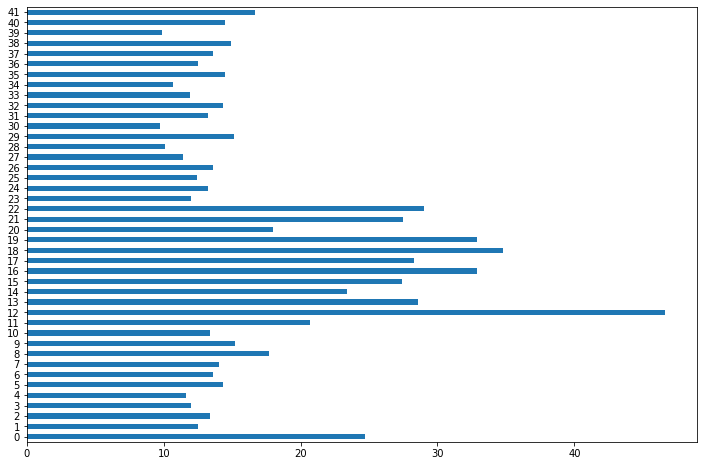

In [11]:
# bar chart of live birth rates
povData[povData['Region']<=3]['LiveBirthRate'].plot(kind='barh',figsize=(12,8));

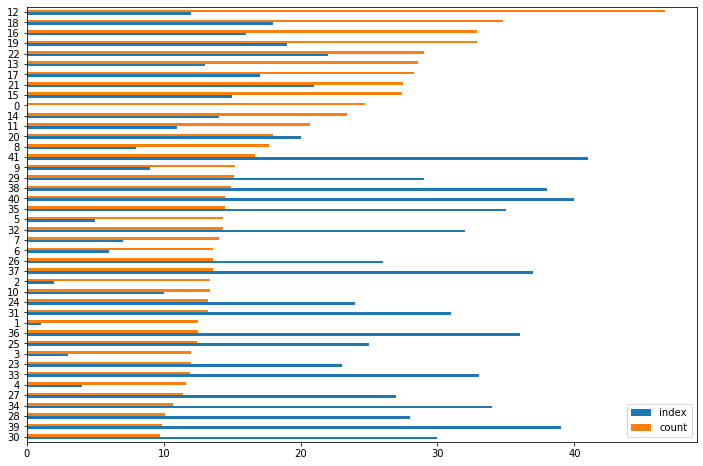

In [12]:
# pareto chart of live birth rates
povData[povData['Region']<=3]['LiveBirthRate'].reset_index(name='count').sort_values(by='count',ascending=True).plot(kind='barh',figsize=(12,8));

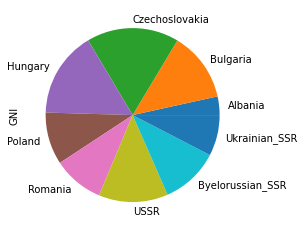

In [13]:
# pie chart of GNI of countries in region 1
reg1_data=povData[povData['Region']==1]
reg1_country_gni=reg1_data[['Country','GNI']]
reg1_country_gni.set_index('Country',inplace=True)
reg1_country_gni
reg1_country_gni['GNI'].plot(kind='pie',);

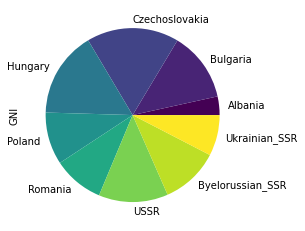

In [14]:
reg1_country_gni['GNI'].plot(kind='pie',colormap='viridis');

<AxesSubplot:ylabel='Country'>

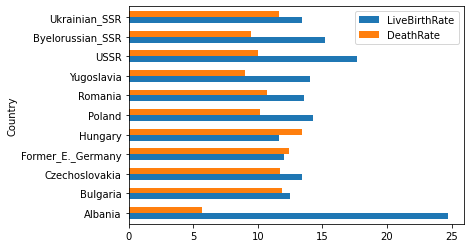

In [15]:
# plot birth and death rates for region 1 
povData[povData['Region']==1][['Country','LiveBirthRate','DeathRate']].set_index('Country').plot(kind='barh',width=0.6)

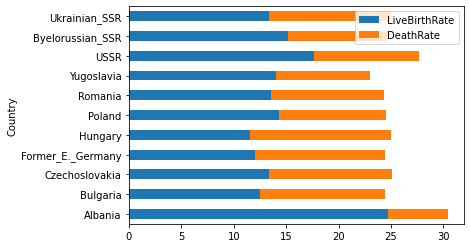

In [16]:
# plot birth and death rates for region 1 in a stacked bar chart
povData[povData['Region']==1][['Country','LiveBirthRate','DeathRate']].set_index('Country').plot(kind='barh',stacked=True);

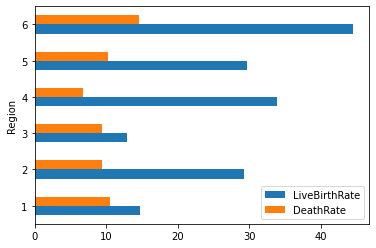

In [17]:
# Group data by region and plot average birth and death rates
grp_data=povData.groupby('Region')[['LiveBirthRate','DeathRate']].mean()
grp_data.plot(kind='barh',);

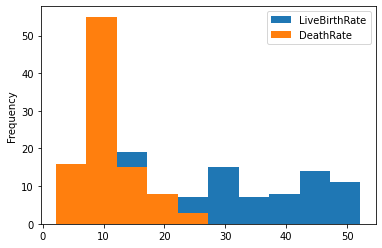

In [18]:
# histogram of birth and death rates
povData[['LiveBirthRate','DeathRate']].plot(kind='hist');

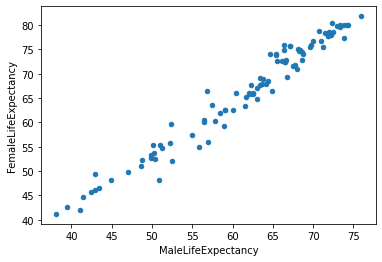

In [19]:
# scatter plot of male and female life expectancies
povData.plot(x='MaleLifeExpectancy',y='FemaleLifeExpectancy',kind='scatter');

<AxesSubplot:>

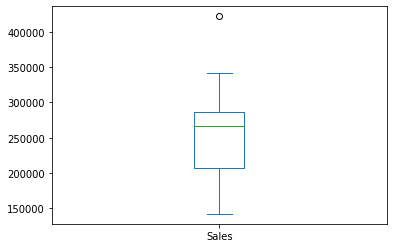

In [22]:
# box plot of 2002 sales
data_2002=salesData[salesData.index.year==2002]
data_2002.plot(kind='box')

<AxesSubplot:>

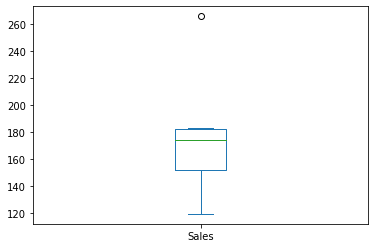

In [23]:
# box plot of first 6 months sales
from datetime import datetime
sales_6mon=salesData[salesData.index<=datetime(day=1,month=6,year=2001)]
sales_6mon.plot(kind='box')

## Advanced Visualization using matplotlib

Visualizations can be further customized by using the pyplot pmatplotlib library. To use matplotlib, we must first import the `matplotlib.pyplot` package.

Depending on configuration settings, the plots that you create may appear in a separate window. You can modify this behavior to produce the plots inline (below the code cell) and store the plots in the notebook.

In [25]:
# majic to make plots inline

%matplotlib inline

# import matplotlib.plyplot

import matplotlib.pyplot as plt

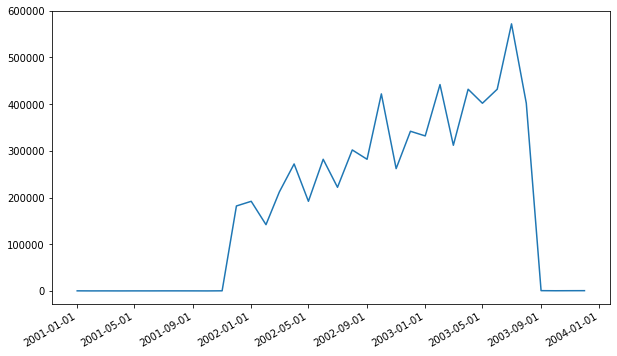

In [26]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(salesData['Sales'])
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
year_month_day_formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(year_month_day_formatter)
plt.show()

Another useful resource besides the matplotlib website is the [Python Graph Gallery](https://www.python-graph-gallery.com/).